<h1> Heart Disease Dataset </h1>
<p> Cardiovascular diseases are the number 1 cause of death globally, accounting for 31% of deaths worldwide. People with cardiovascular disease or who are at high risk need detection and management wherein a machine learning model can greatly help the masses.</p>




In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import random
import pydotplus
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from io import StringIO
from scipy import stats
from itertools import groupby

In [2]:
heart_csv = pd.read_csv("heart.csv")
heart_csv


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<h4> Descriptive Statistics of Qualitative Data </h4>
<p> To get an over overall idea of the numerical values of a few qualitative variables in the dataset </p>
<p> Finding the mean, median, minimum, and maximum of Cholesterol, Resting Blood Pressure and Max Heart rate </p>

In [4]:
#determining cholestrol of heart disease and normal heart
print(heart_csv.groupby('HeartDisease')['Cholesterol'].agg([min,max,np.mean, np.median]))

              min  max        mean  median
HeartDisease                              
0               0  564  227.121951   227.0
1               0  603  175.940945   217.0


In [5]:
#determining Resting Blood Pressure of heart disease and normal heart
print(heart_csv.groupby('HeartDisease')['RestingBP'].agg([min,max,np.mean, np.median]))

              min  max        mean  median
HeartDisease                              
0              80  190  130.180488   130.0
1               0  200  134.185039   132.0


In [6]:
#determining cholestrol of max hr of heart disease and normal heart
print(heart_csv.groupby('HeartDisease')['MaxHR'].agg([min,max,np.mean, np.median]))

              min  max        mean  median
HeartDisease                              
0              69  202  148.151220   150.0
1              60  195  127.655512   126.0


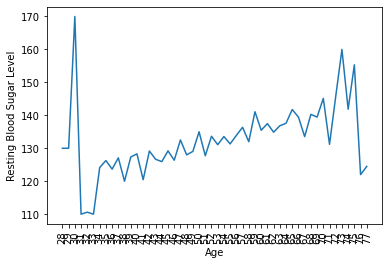

In [7]:
pivot_BP = heart_csv.pivot_table(values="RestingBP", index="Age", aggfunc=[np.sum, np.mean, np.min, np.max, np.std])
pivot_BP

#pulls out the mean resing blood pressure level, and shows the relationship between the index aka Age
plt.plot(pivot_BP.index, pivot_BP["mean"])
plt.xticks(pivot_BP.index, rotation=90)
plt.xlabel("Age")
plt.ylabel("Resting Blood Sugar Level")
plt.show()

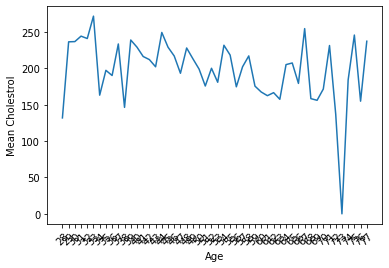

In [8]:
#This graph shows the mean cholestrol level for each age
pivot_Chol = heart_csv.pivot_table(values="Cholesterol", index="Age", aggfunc=[np.sum, np.mean, np.min, np.max, np.std])
#pulls out the mean cholestrol level, and shows the relationship between the index aka Age
plt.plot(pivot_Chol.index, pivot_Chol["mean"])

#labeling the x and y axis
plt.xticks(pivot_Chol.index, rotation=45)
plt.xlabel("Age")
plt.ylabel("Mean Cholestrol")
plt.show()

<h4> Delving into the Data </h4>

<p> getting more background on the sexes in this dataset, by looking at the sum, mean, minimum, maximum and standard deviation of the numbers of having heart disease and not having heart disease </p>

<p>This pivot table shows that in the sample from the dataset, 50 females are positive for heart disease
and there are 458 males positive for heart disease so from the dataset there are 193 women and 725, so 25.9% female positive, and 63% male </p>

In [9]:
Heartdis_sex = heart_csv.pivot_table(values="HeartDisease", index="Sex", aggfunc=[np.sum, np.mean, np.min, np.max, np.std])
Heartdis_sex


,sum,mean,amin,amax,std
,HeartDisease,HeartDisease,HeartDisease,HeartDisease,HeartDisease
Sex,,,,,
F,50,0.259067,0,1,0.439262
M,458,0.631724,0,1,0.482670


In [10]:
heart_csv["Sex"].value_counts()
heart_csv

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


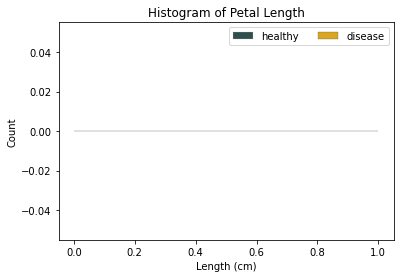

In [11]:
male = heart_csv[heart_csv["Sex"] == "M"].reset_index(drop = True)
female = heart_csv[heart_csv["Sex"] == "F"].reset_index(drop = True)

disease= heart_csv[heart_csv["HeartDisease"] == "1"].reset_index(drop = True)
healthy= heart_csv[heart_csv["HeartDisease"] == "0"].reset_index(drop = True)


# Define figure and axis
fig, axs = plt.subplots(1,1)

# Set labels
axs.set_title("Histogram of Petal Length")
axs.set_xlabel("Length (cm)")
axs.set_ylabel("Count")

axs.hist(healthy["Cholesterol"], color = "darkslategrey", edgecolor = "silver", linewidth = .25, label = "healthy")
axs.hist(disease["Cholesterol"],  color = "goldenrod", edgecolor = "darkslategrey", linewidth = .25, label = "disease")

# Add Legend. Make it horizontal instead of vertical. 
axs.legend(ncol = 3)

plt.show()

In [12]:
male.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
2,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
3,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
4,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0


In [13]:
#this gives the descriptive statistics for all of the following qualitative variables 
heart_csv.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


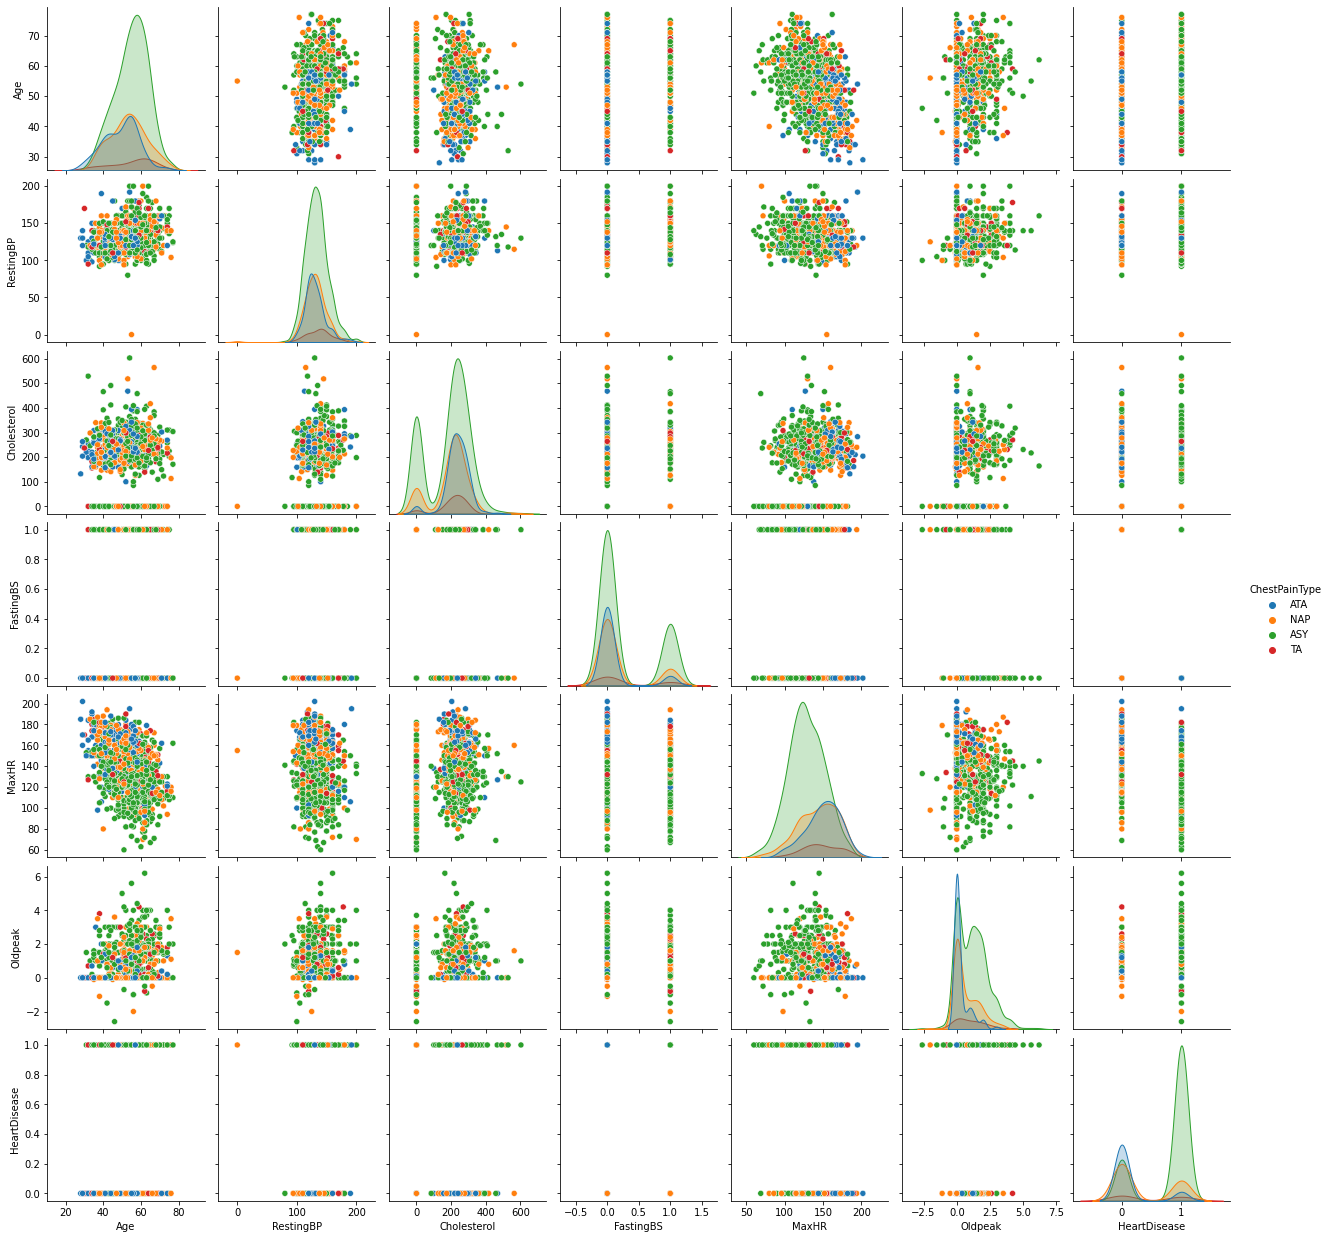

In [14]:
#pairplots create a whole view of how each variable relate to one another. 
#Here, I show how each of types of chest pain are displayed with the rest of the variables. 
sns.pairplot(heart_csv, hue='ChestPainType')

<h4> Findings from Chest Pain Pairplot</h4>
<p> The green ASY (Asymptomatic) is the greatest density for any of the patients. The high density of asymptomatic chest pain is worrisome as many people don't think there is anything wrong with their health until they are physically in pain. From the last histogram, it shows how much more asymptomatic individiuals there are compared to any other chest pain type. That being said, it would be uncalled for to have chest pain type be an identifier of heart disease </p>

/Users/abbywillard/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


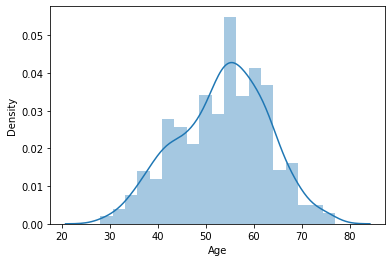

54.0

In [23]:
#Histogram to show the age of individuals within the dataset
sns.distplot(heart_csv['Age'], kde=True, rug=False)
plt.show()
heart_csv['Age'].median()

In [24]:
heart_csv['Age'].mean()

53.510893246187365

<h4> Interpretation of Age Histogram </h4>
<p> The histogram above is slightly skewed left. Here, the median is slightly larger than the mean of the ages. The histogram is close to being symmetric but is slightly skewed left.</p>

/Users/abbywillard/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


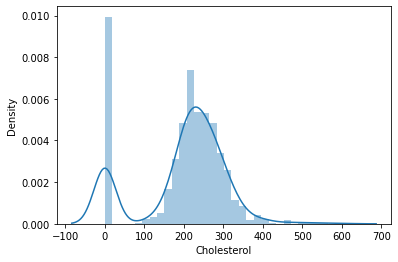

198.7995642701525

In [25]:
heart_csv.dropna()
sns.distplot(heart_csv['Cholesterol'], kde=True, rug=False)
plt.show()
heart_csv['Cholesterol'].mean()

In [27]:
heart_csv['Cholesterol'].median()

223.0

<h4> Interpretation of Cholestrol Histogram </h4>
<p> The histogram above is slightly skewed right. Here, the mean is larger than the median Cholesterol. </p>

In [3]:
#creating cross tab to form heatmap 
#showing sex with Heart Disease
heat_sex = pd.crosstab(heart_csv['Sex'],heart_csv['HeartDisease'], 
                       values = heart_csv["HeartDisease"], aggfunc= 'count')
heat_sex.head()

HeartDisease,0,1
Sex,,
F,143,50
M,267,458


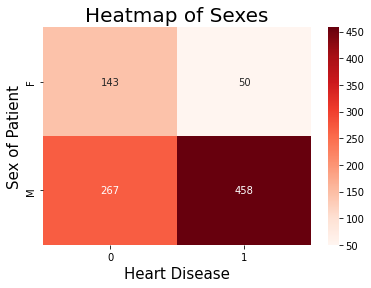

In [4]:
#heat map of sexes with heart disease
sns.heatmap(heat_sex,annot=True, cmap= 'Reds',fmt='g')
#labels for heatmap
plt.title('Heatmap of Sexes', fontsize = 20) # title with fontsize 20
plt.ylabel('Sex of Patient', fontsize = 15) # x-axis label with fontsize 15
plt.xlabel('Heart Disease', fontsize = 15) # y-axis label with fontsize 15
plt.savefig('graphics/heatmapofsex.png')

In [35]:
#creating cross tab to form heatmap 
#showing Age with Heart Disease
heart_df = pd.crosstab(heart_csv['Age'],heart_csv['HeartDisease'], 
                       values = heart_csv["HeartDisease"], aggfunc= 'count')
heart_df.head()

HeartDisease,0,1
Age,,
28,1.0,NaN
29,3.0,NaN
30,1.0,NaN
31,1.0,1.0
32,3.0,2.0


Text(33.0, 0.5, 'Heart Disease')

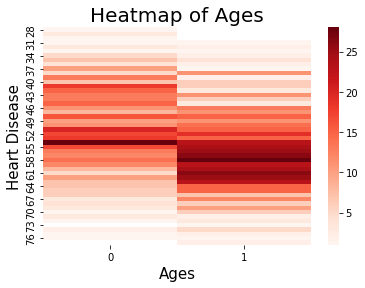

In [38]:
#Age vs heart disease heat map
sns.heatmap(heart_df,cmap= 'Reds')
#labels for heatmap
plt.title('Heatmap of Ages', fontsize = 20) # title with fontsize 20
plt.xlabel('Ages', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Heart Disease', fontsize = 15) # y-axis label with fontsize 15

<h4> Heart Disease Most Common in Individuals in Their Late 50s </h4>
<p> It is apparent by the density of the heat map that shows true (1) for Heart Disease is set around the 50-60 mark. It is most common for individuals to get tested for heart disease at 55, which makes sense for the age bracket having heart disease </p>

In [40]:
#creating cross tab to form heatmap
#max heart and heart disease
heart_maxhr = pd.crosstab(heart_csv['MaxHR'],heart_csv['HeartDisease'], 
                       values = heart_csv["HeartDisease"], aggfunc= 'count')
heart_maxhr.head()

HeartDisease,0,1
MaxHR,,
60,NaN,1.0
63,NaN,1.0
67,NaN,1.0
69,1.0,NaN
70,NaN,1.0


Text(33.0, 0.5, 'Heart Disease')

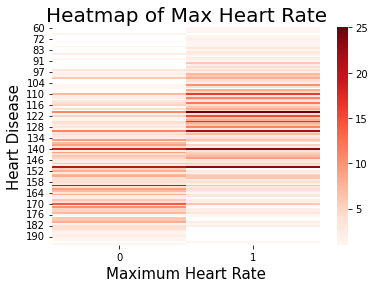

In [41]:
#creating heatmap for max heart rate
sns.heatmap(heart_maxhr, cmap= 'Reds')
#labels for heatmap
plt.title('Heatmap of Max Heart Rate', fontsize = 20) # title with fontsize 20
plt.xlabel('Maximum Heart Rate', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Heart Disease', fontsize = 15) # y-axis label with fontsize 15

<h4> Heart Disease Positive Patients have lower MaxHR than individuals who do not have heart diesase </h4>
<p> This heat map is not as apparent as the previous one, but you can still determine a relationship from the densities of the two categories. The density for those who don't have heart diease is closer to a max heart rate of 134- 176 approximately. For those who do have heart disease have high density of max heart rate around 110-146 approximately.</p>

In [89]:
#creating cross tab to form heatmap
#old peak and heart disease
heat_fast= pd.crosstab(heart_csv['FastingBS'],heart_csv['HeartDisease'], 
                       values = heart_csv["HeartDisease"], aggfunc= 'count')
heat_fast.head()

HeartDisease,0,1
FastingBS,,
0,366,338
1,44,170


Text(33.0, 0.5, 'Heart Disease')

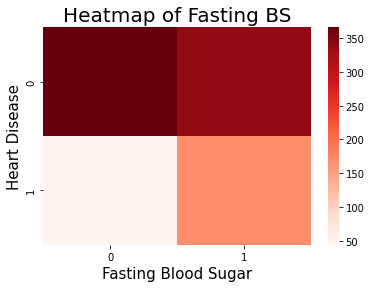

In [93]:
sns.heatmap(heat_fast, cmap= 'Reds')

plt.title('Heatmap of Fasting BS', fontsize = 20) # title with fontsize 20
plt.xlabel('Fasting Blood Sugar', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Heart Disease', fontsize = 15) # y-axis label with fontsize 15

Fasting BS shows no correlation to heart disease

In [33]:
#creating cross tab to form heatmap
#old peak and heart disease
heart_oldpeak = pd.crosstab(heart_csv['Oldpeak'],heart_csv['HeartDisease'], 
                       values = heart_csv["HeartDisease"], aggfunc= 'count')
heart_oldpeak.head()

HeartDisease,0,1
Oldpeak,,
-2.6,NaN,1.0
-2.0,NaN,1.0
-1.5,NaN,1.0
-1.1,1.0,NaN
-1.0,NaN,2.0


In [25]:
#creating cross tab to form heatmap
#old peak and heart disease
heat_restbp = pd.crosstab(heart_csv['RestingBP'],heart_csv['HeartDisease'], 
                       values = heart_csv["HeartDisease"], aggfunc= 'count')
heat_restbp.head()

HeartDisease,0,1
RestingBP,,
0,NaN,1.0
80,1.0,NaN
92,NaN,1.0
94,2.0,NaN
95,NaN,6.0


Text(33.0, 0.5, 'Heart Disease')

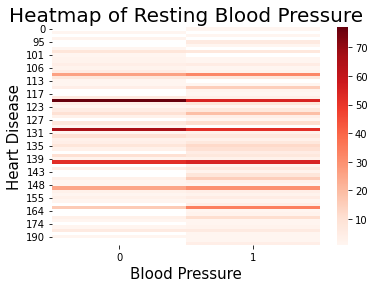

In [26]:
#creating heat map for restbp
sns.heatmap(heat_restbp, cmap= 'Reds')

#labels for heat map
plt.title('Heatmap of Resting Blood Pressure', fontsize = 20) # title with fontsize 20
plt.xlabel('Blood Pressure', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Heart Disease', fontsize = 15) # y-axis label with fontsize 15

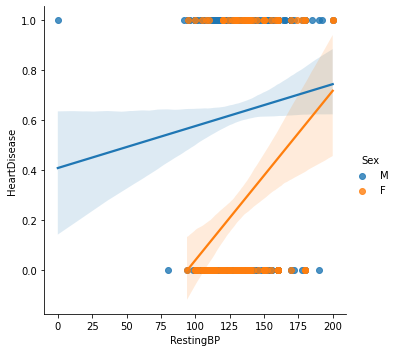

In [30]:
sns.lmplot(data=heart_csv,
         y="HeartDisease",
         x="RestingBP",
          hue = "Sex")

<h3> Traits of Heart Disease Positive Individuals</h3>
<p> from the heatmaps we can determine the following traits of positive heart disease individuals </p>
 
<ul>
    <li>
        Mostly male </li>
    <li>
        Older individuals </li>
    <li> Lower heart rate </li>
    <li> Old peak levels </li>
    
    
    
  
    

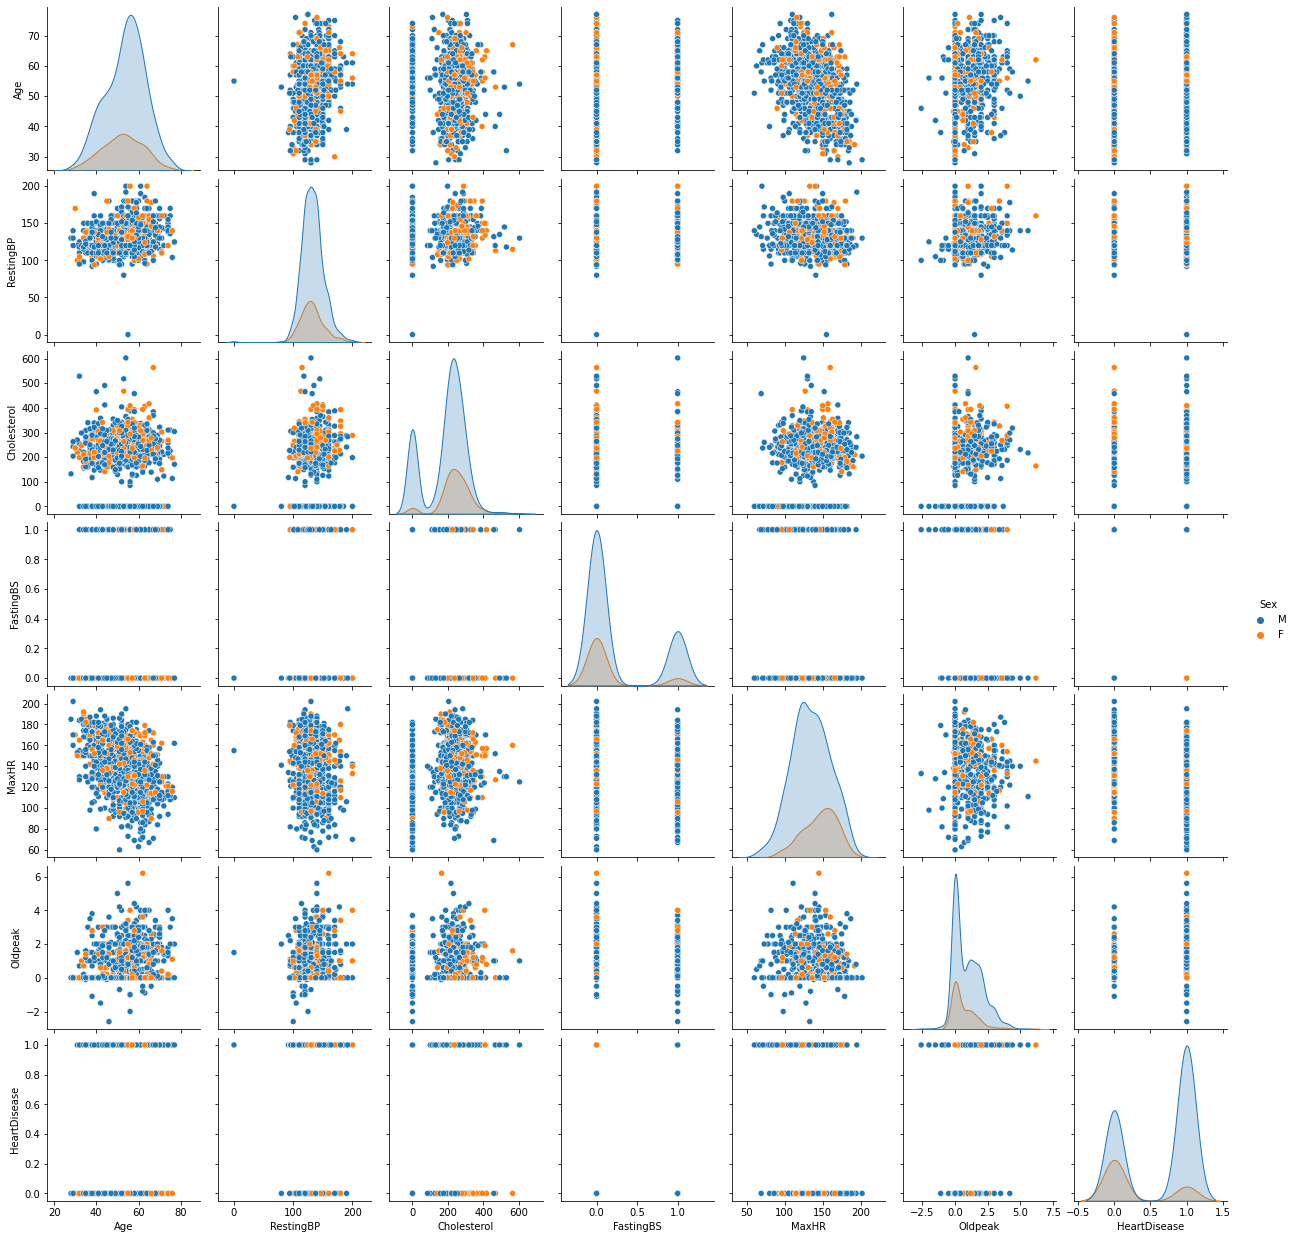

In [39]:
sns.pairplot(heart_csv, hue='Sex')

<h5> Overall more men than women in this dataset </h5>
<p>

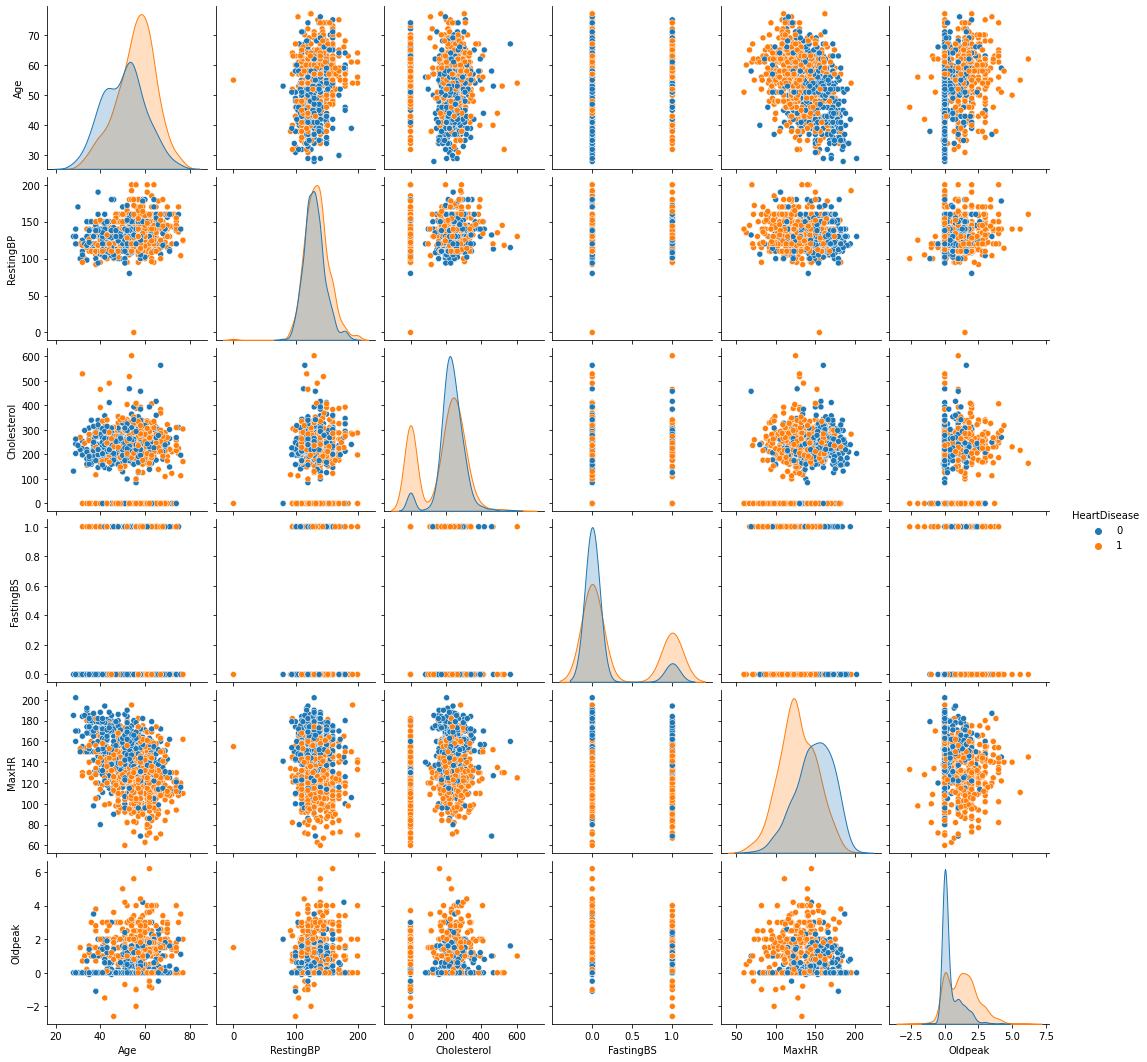

In [38]:
sns.pairplot(heart_csv, hue='HeartDisease')

<h5> Two Distinct Values for having heart disease and not having heart disease </h5>
<p> decreasing Max Hr as individuals get older </p>
<p> Having heart disease creates more variablility in ones oldpeak </p>


In [131]:
#RUN A bernoulli trial of 10,000 runs using 100,000 trials
lst = np.random.random(size = 100)  <0.5
print(lst)

#create a list of tuples indicating how many times true or false appeared in a row 

[False False False False  True  True  True  True  True False  True False
 False False False False False False False  True  True False False  True
  True  True False  True  True  True False False False  True  True False
  True False False False False  True  True False False False  True False
  True  True False  True  True False False  True False  True  True False
  True  True False  True  True False  True False False  True False False
 False  True  True  True False  True False  True False False False False
 False False False  True  True  True False  True False False  True  True
  True False False  True]


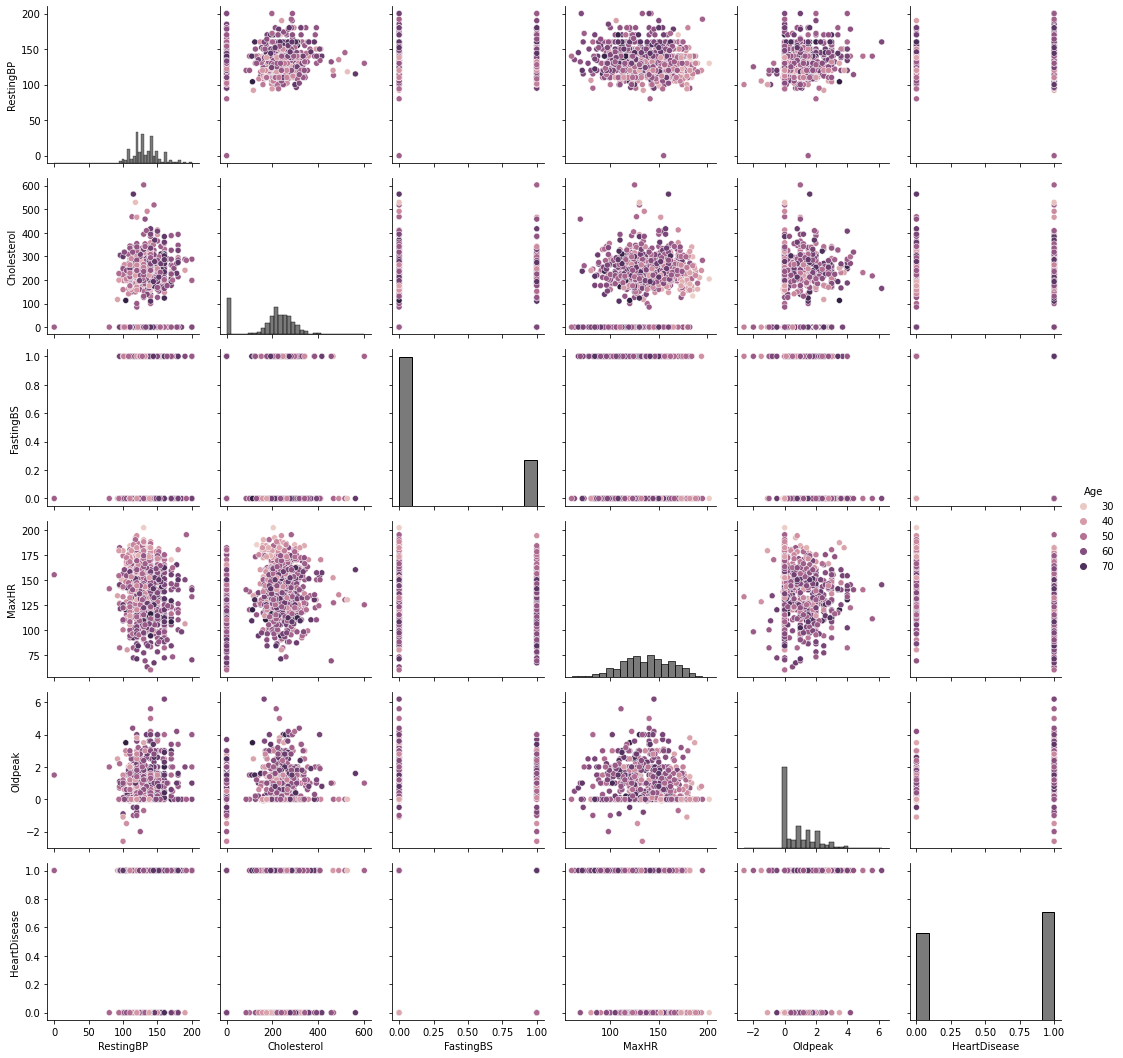

In [41]:
g = sns.PairGrid(heart_csv, hue="Age")
g.map_diag(sns.histplot, hue=None, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()

<h5> the most evident relationship in these pairplots is the relationship between Age and MaxHr</h5>
<p> Max heart rate, the highest heart rate you can safely hit during exercise—decreases with age regardless of lifestyle or level of fitness. It's because older hearts simply can't beat as fast as younger hearts. Is this natural slowing of the heart a greater reason as to why so many individuals in the 50 and up age category to be susceptable to such diseas?</p>

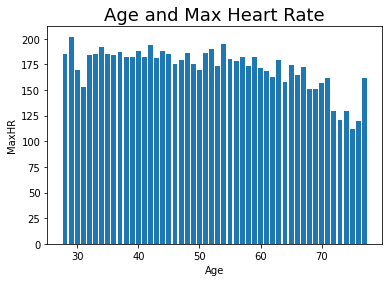

In [49]:
width = 0.8
plt.bar(x=heart_csv['Age'], height=heart_csv['MaxHR'], width=width)
plt.title('Age and Max Heart Rate', fontsize=18)
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.show()


<p> Shows as patients age, the lower their max heart rate becomes </p>

In [58]:
print(heart_csv.groupby('HeartDisease')['MaxHR'].agg([min,max,np.mean, np.median]))

#creating hypothesis test to determine if are findings are 

              min  max        mean  median
HeartDisease                              
0              69  202  148.151220   150.0
1              60  195  127.655512   126.0


<AxesSubplot:title={'center':'Age'}, xlabel='ChestPainType'>

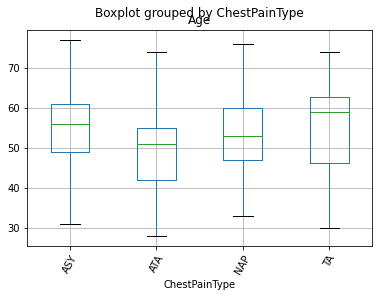

In [16]:
heart_csv.boxplot('Age', 'ChestPainType', rot=60)

<AxesSubplot:title={'center':'Age'}, xlabel='RestingECG'>

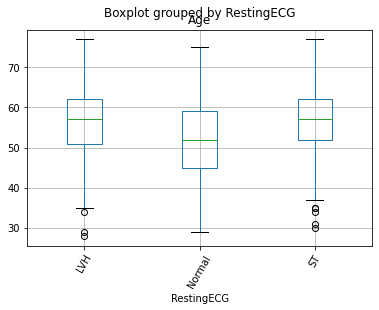

In [17]:
heart_csv.boxplot('Age', 'RestingECG', rot=60)

In [18]:
heart_csv

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<h3> Traits of Heart Disease Positive Individuals</h3>
<p> from the heatmaps and EDA above, we can determine the following traits of positive heart disease individuals </p>
 
<ul>
    <li> 
        Mostly male </li>
    <li>
        Older individuals </li>
    <li> Lower heart rate </li>
    </ul>
    
    
  
   

<p> To determine if these traits are significant, we will perform statistical tests to evaluate if the p value is significant or not</p>

<h5> Older individuals Hypothesis Test </h5>
Assumptions
<ul>
    <li>Observations in each sample are independent and identically distributed (iid).</li>
    <li>Observations in each sample are normally distributed.</li>
    <li>Observations in each sample have the same variance.</li> </ul>
Interpretation

H0: the means of the samples are equal.
H1: the means of the samples are unequal.